In [29]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [30]:

df = pd.read_csv("/home/ivan/Загрузки/tested.xls") 



In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [33]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


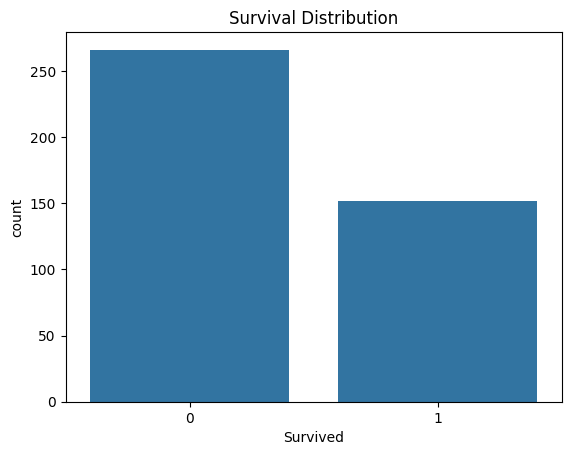

In [35]:
sns.countplot(data=df , x='Survived')
plt.title('Survival Distribution')
plt.show()


In [2]:
# выжило людишек меньше, и это всё, что мы видим из этого плота) а, 
# ну ещё чуть больше 250 померло, около 150 живут!!!

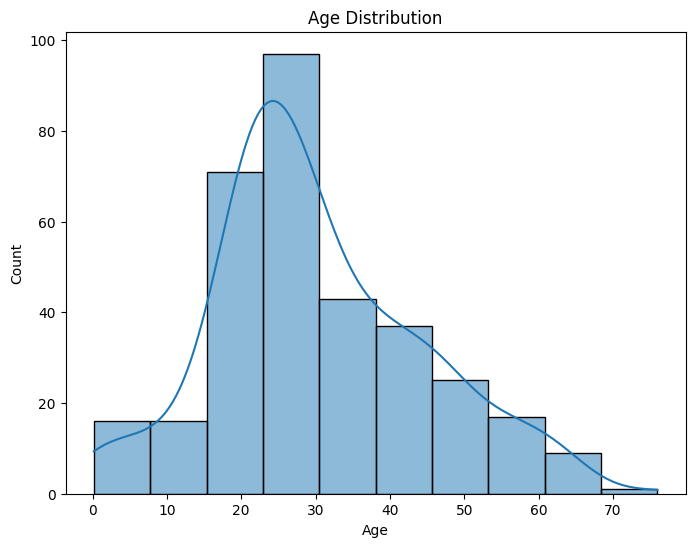

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

In [38]:
# видим, как ни странно, среднее количество людей среднего
# возраста(20-30 лет), а остальные - в хвостах 

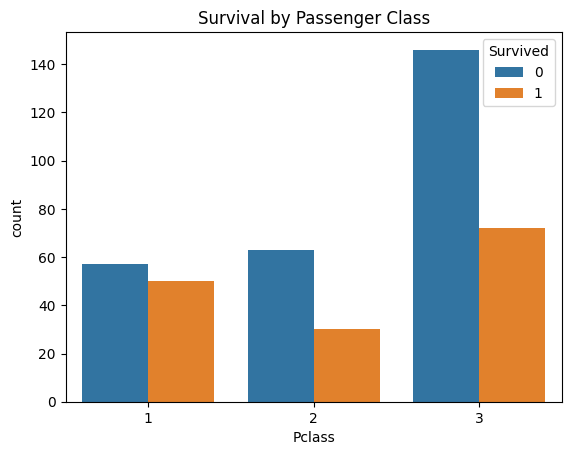

In [39]:
sns.countplot( x='Pclass', hue='Survived'  ,data=df)
plt.title('Survival by Passenger Class')
plt.show()

In [40]:
#  мы видим, что "бедняков" из 3-го класса было больше всего, поэтому и погибло так много.

In [2]:
# а вот у ребят из 1-го класса дела немного лучше. нулей и единичек почти поровну. 
# понятно, кому достались все спасательные шлюпки)

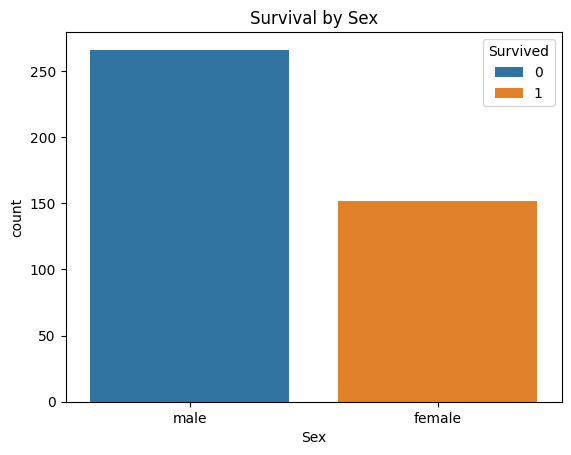

In [42]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

In [43]:
# все мужики умерли, в то время как все девочки выжили) вот это поворот, 
# неожиданно конечно... наверное, первые помогали вторым как в кино.

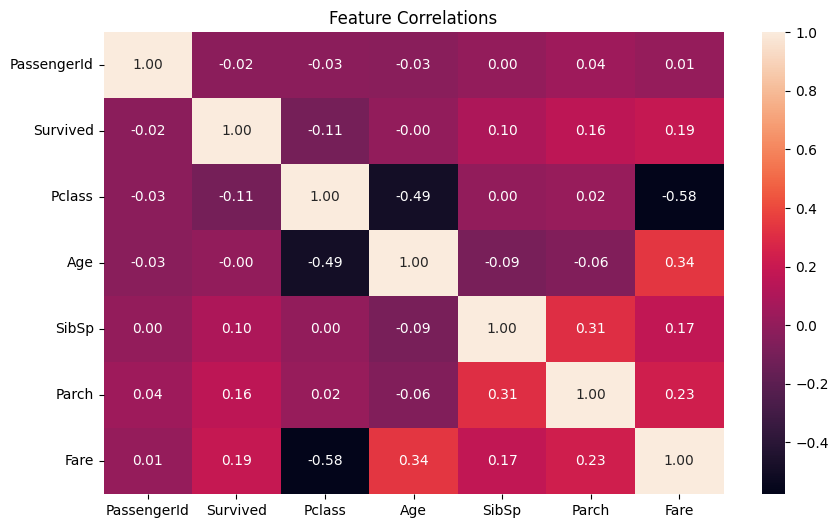

In [44]:
col_num=df.select_dtypes(exclude="object").columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_num].corr(), annot=True, 
            
            fmt='.2f')
plt.title('Feature Correlations')
plt.show()

In [45]:
#чем больше класс, тем меньше стоит проезд. логично. чем больше класс, тем меньше 
# возраст. тоже звучит логично, молодые ещё не успели 

In [46]:
#заработать столько же, сколько старики. с выживаемостью обратно коррелирует 
# класс, что мы видели на графике. чем выше(чем беднее) класс

In [47]:
#тем меньше выживаемость. но выживаемость была тем выше, чем больше 
# родственников ехали вместе. помогали друг другу. 

In [48]:
# ОСТОРОЖНО!!! ПРОПОГАНДА ТРАДИЦИОННЫХ ЦЕННОСТЕЙ!!!!!!!!!!!!!!!!

In [49]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [50]:
#дополняем все пропуски возраста медианой, чтобы не повадно было 

In [51]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [53]:
# тоже самое с фичой "высадки" с заменой на моду.